In [ ]:
import sys

# Install NLTK and spaCy
!{sys.executable} -m pip install nltk spacy

# Download NLTK data (e.g., 'punkt' for tokenization, 'stopwords' for stop words)
import nltk
nltk.download('punkt', quiet=True) # Download 'punkt' tokenizer data
nltk.download('stopwords', quiet=True) # Download 'stopwords' corpus
nltk.download('punkt_tab', quiet=True) # Download 'punkt_tab' as suggested by the error

# Download spaCy English model
# 'en_core_web_sm' is a small English model
# If you encounter issues, try running '!python -m spacy download en_core_web_sm' directly in a new cell
try:
    import spacy
    spacy.load('en_core_web_sm')
except OSError:
    print('Downloading spaCy model en_core_web_sm...')
    !{sys.executable} -m spacy download en_core_web_sm
    print('spaCy model en_core_web_sm downloaded.')

print("\n--- Libraries and data prepared ---\n")

# --- Basic NLTK Usage Example ---
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

text_nltk = "NLTK is a powerful library for natural language processing."
words_nltk = word_tokenize(text_nltk)
stop_words = set(stopwords.words('english'))
filtered_words_nltk = [word for word in words_nltk if word.lower() not in stop_words and word.isalnum()]

print("NLTK Example:")
print(f"Original text: {text_nltk}")
print(f"Tokenized words: {words_nltk}")
print(f"Filtered words (stopwords removed): {filtered_words_nltk}")

print("\n--- Basic spaCy Usage Example ---\n")

# --- Basic spaCy Usage Example ---
import spacy

nlp = spacy.load('en_core_web_sm')
text_spacy = "spaCy is an open-source software library for advanced natural language processing, written in the programming languages Python and Cython."
doc = nlp(text_spacy)

print("spaCy Example:")
print(f"Original text: {text_spacy}")
print("Tokens and their Part-of-Speech (POS) tags:")
for token in doc:
    print(f"  {token.text:<10} {token.pos_:<10} {token.dep_:<10}")

print("Named Entities:")
for ent in doc.ents:
    print(f"  {ent.text:<20} {ent.label_:<10}")


--- Libraries and data prepared ---

NLTK Example:
Original text: NLTK is a powerful library for natural language processing.
Tokenized words: ['NLTK', 'is', 'a', 'powerful', 'library', 'for', 'natural', 'language', 'processing', '.']
Filtered words (stopwords removed): ['NLTK', 'powerful', 'library', 'natural', 'language', 'processing']

--- Basic spaCy Usage Example ---

spaCy Example:
Original text: spaCy is an open-source software library for advanced natural language processing, written in the programming languages Python and Cython.
Tokens and their Part-of-Speech (POS) tags:
  spaCy      NUM        nsubj     
  is         AUX        ROOT      
  an         DET        det       
  open       ADJ        amod      
  -          PUNCT      punct     
  source     NOUN       compound  
  software   NOUN       compound  
  library    NOUN       attr      
  for        ADP        prep      
  advanced   ADJ        amod      
  natural    ADJ        amod      
  language   NOUN       c

In [ ]:
essay_text = """
[PASTE YOUR ESSAY HERE]
"""

# IMPORTANT: Replace '[PASTE YOUR ESSAY HERE]' above with your actual academic essay.
# Example:
# essay_text = """The rapid advancement of artificial intelligence (AI) has profound implications for various sectors of society. While AI promises significant improvements in efficiency, automation, and data analysis, it also raises complex ethical and societal challenges..."""

print(f"Essay loaded. Length: {len(essay_text.strip())} characters.")
if len(essay_text.strip()) < 100:
    print("Warning: The essay text appears to be very short. Please ensure you have pasted the full essay into the placeholder.")

Essay loaded. Length: 23 characters.


In [8]:
essay_text = """
The rapid advancement of artificial intelligence (AI) has profound implications for various sectors of society. While AI promises significant improvements in efficiency, automation, and data analysis, it also raises complex ethical and societal challenges that require careful consideration. One primary concern is the impact on employment, as AI-driven automation could displace human workers in many industries, necessitating widespread retraining and new social safety nets. Furthermore, the increasing autonomy of AI systems, particularly in areas like autonomous weapons and critical infrastructure management, demands robust regulatory frameworks and transparent decision-making processes to ensure accountability and prevent unintended consequences. Bias embedded in AI algorithms, often reflecting biases present in the training data, poses another critical challenge, potentially perpetuating and even amplifying social inequalities if not rigorously addressed during development and deployment. The ethical considerations extend to privacy, as AI systems often rely on vast amounts of personal data, raising questions about data ownership, consent, and potential misuse. Moreover, the 'black box' nature of some advanced AI models, where their decision-making processes are opaque, presents challenges for auditing, understanding, and trusting their outputs, especially in high-stakes applications like healthcare or criminal justice. Addressing these multifaceted challenges requires a multidisciplinary approach, involving collaboration between technologists, ethicists, policymakers, and the public, to shape the development and deployment of AI in a manner that maximizes its benefits while mitigating its risks for a more equitable and sustainable future.
"""
# IMPORTANT: Replace '[PASTE YOUR ACTUAL ESSAY TEXT HERE]' above with your academic essay.
# If you have already defined 'essay_text' in another cell, executing this cell will overwrite it.

print(f"Essay loaded. Length: {len(essay_text.strip())} characters.")
if len(essay_text.strip()) < 100:
    print("Warning: The essay text appears to be very short. Please ensure you have pasted the full essay into the placeholder.")

Essay loaded. Length: 1770 characters.


In [13]:
import spacy

# Load the English spaCy model (if not already loaded)
try:
    nlp = spacy.load('en_core_web_sm')
except OSError:
    print('Downloading spaCy model en_core_web_sm...')
    !python -m spacy download en_core_web_sm
    nlp = spacy.load('en_core_web_sm')
    print('spaCy model en_core_web_sm downloaded and loaded.')

# Process the essay text with spaCy
doc = nlp(essay_text)

print("--- Tokenization and Universal POS Tagging with spaCy ---")
print("Tokens and their Universal Part-of-Speech (POS) tags:")
for token in doc:
    # token.text gives the token text
    # token.pos_ gives the universal part-of-speech tag
    # token.tag_ gives the detailed part-of-speech tag
    print(f"  {token.text:<20} {token.pos_:<10} (Detailed: {token.tag_:<10})")

# You can also get a list of just the words (excluding punctuation) like this:
words_only = [token.text for token in doc if token.is_alpha]
print(f"\nTotal tokens (including punctuation): {len(doc)}")
print(f"Total words (alphabetic only): {len(words_only)}")
print(f"First 20 words (alphabetic only): {words_only[:20]}")

# Observe the unique universal tag set used
unique_spacy_universal_tags = sorted(list(set(token.pos_ for token in doc)))
print(f"\nUnique spaCy Universal POS Tags ({len(unique_spacy_universal_tags)}): {unique_spacy_universal_tags}")


--- Tokenization and Universal POS Tagging with spaCy ---
Tokens and their Universal Part-of-Speech (POS) tags:
  
                    SPACE      (Detailed: _SP       )
  The                  DET        (Detailed: DT        )
  rapid                ADJ        (Detailed: JJ        )
  advancement          NOUN       (Detailed: NN        )
  of                   ADP        (Detailed: IN        )
  artificial           ADJ        (Detailed: JJ        )
  intelligence         NOUN       (Detailed: NN        )
  (                    PUNCT      (Detailed: -LRB-     )
  AI                   PROPN      (Detailed: NNP       )
  )                    PUNCT      (Detailed: -RRB-     )
  has                  VERB       (Detailed: VBZ       )
  profound             ADJ        (Detailed: JJ        )
  implications         NOUN       (Detailed: NNS       )
  for                  ADP        (Detailed: IN        )
  various              ADJ        (Detailed: JJ        )
  sectors              NOUN      

In [12]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag

# Ensure NLTK 'averaged_perceptron_tagger_eng' is downloaded
nltk.download('averaged_perceptron_tagger_eng', quiet=True)
print('NLTK averaged_perceptron_tagger_eng ensured.')

print("--- POS Tagging with NLTK ---")

# Tokenize the essay text using NLTK
# We'll use the already defined 'essay_text' from a previous cell
nltk_tokens = word_tokenize(essay_text)

# Apply NLTK's POS tagger
pos_tags_nltk = pos_tag(nltk_tokens)

print("Tokens and their NLTK Part-of-Speech (POS) tags:")
for word, tag in pos_tags_nltk:
    print(f"  {word:<20} {tag:<10}")

# Observe the unique tag set used
unique_nltk_tags = sorted(list(set(tag for word, tag in pos_tags_nltk)))
print(f"\nTotal NLTK tokens: {len(pos_tags_nltk)}")
print(f"Unique NLTK POS Tags ({len(unique_nltk_tags)}): {unique_nltk_tags}")

NLTK averaged_perceptron_tagger_eng ensured.
--- POS Tagging with NLTK ---
Tokens and their NLTK Part-of-Speech (POS) tags:
  The                  DT        
  rapid                JJ        
  advancement          NN        
  of                   IN        
  artificial           JJ        
  intelligence         NN        
  (                    (         
  AI                   NNP       
  )                    )         
  has                  VBZ       
  profound             VBN       
  implications         NNS       
  for                  IN        
  various              JJ        
  sectors              NNS       
  of                   IN        
  society              NN        
  .                    .         
  While                IN        
  AI                   NNP       
  promises             VBZ       
  significant          JJ        
  improvements         NNS       
  in                   IN        
  efficiency           NN        
  ,                    ,  

In [14]:
# As requested previously, spaCy POS tagging has already been applied and the universal tags observed.
# The output from the last execution of cell 'XOgwiH7XM98U' contains this information.
#
# Summary from previous run:
# Unique spaCy Universal POS Tags: ['ADJ', 'ADP', 'ADV', 'AUX', 'CCONJ', 'DET', 'NOUN', 'NUM', 'PART', 'PRON', 'PROPN', 'PUNCT', 'SCONJ', 'SPACE', 'VERB']
#
# Please let me know if you'd like to perform a different analysis or have a specific question about these tags.

In [15]:
import spacy

# Ensure spaCy model is loaded
try:
    nlp = spacy.load('en_core_web_sm')
except OSError:
    print('Downloading spaCy model en_core_web_sm...')
    !python -m spacy download en_core_web_sm
    nlp = spacy.load('en_core_web_sm')

# Process the essay text (assuming essay_text is already defined and doc is not yet created in this cell)
# If doc is already available from previous cells, this step can be skipped or commented out
if 'doc' not in locals() or 'doc' not in globals():
    doc = nlp(essay_text)

# Identify academic concepts (nouns and proper nouns)
academic_concepts = []
for token in doc:
    # Consider NOUN and PROPN as potential academic concepts
    if token.pos_ in ['NOUN', 'PROPN'] and token.is_alpha:
        academic_concepts.append(token.text)

# Identify arguments (verbs)
arguments = []
for token in doc:
    # Consider VERB and AUX (auxiliary verbs) as potential arguments/actions
    if token.pos_ in ['VERB', 'AUX'] and token.is_alpha:
        arguments.append(token.text)

print("--- Identified Academic Concepts (Nouns) ---")
print(f"Total unique academic concepts: {len(set(academic_concepts))}")
print(f"Concepts: {sorted(list(set(academic_concepts)))[:20]}... (showing first 20 unique)")

print("\n--- Identified Arguments (Verbs) ---")
print(f"Total unique arguments: {len(set(arguments))}")
print(f"Arguments: {sorted(list(set(arguments)))[:20]}... (showing first 20 unique)")

--- Identified Academic Concepts (Nouns) ---
Total unique academic concepts: 67
Concepts: ['AI', 'Bias', 'accountability', 'advancement', 'algorithms', 'amounts', 'analysis', 'applications', 'approach', 'areas', 'auditing', 'automation', 'autonomy', 'benefits', 'biases', 'box', 'challenge', 'challenges', 'collaboration', 'concern']... (showing first 20 unique)

--- Identified Arguments (Verbs) ---
Total unique arguments: 32
Arguments: ['Addressing', 'addressed', 'amplifying', 'are', 'could', 'demands', 'displace', 'driven', 'embedded', 'ensure', 'extend', 'has', 'increasing', 'involving', 'is', 'making', 'maximizes', 'mitigating', 'necessitating', 'perpetuating']... (showing first 20 unique)


In [16]:
from collections import Counter

# Calculate frequency of academic concepts (nouns)
concept_frequency = Counter(academic_concepts)

print("--- Frequency of Academic Concepts (Nouns) ---")
print(f"Total unique concepts: {len(concept_frequency)}")
print("Most common concepts:")
for concept, count in concept_frequency.most_common(10): # Display top 10 most common
    print(f"  - {concept}: {count}")

# Calculate frequency of arguments (verbs)
argument_frequency = Counter(arguments)

print("\n--- Frequency of Arguments (Verbs) ---")
print(f"Total unique arguments: {len(argument_frequency)}")
print("Most common arguments:")
for argument, count in argument_frequency.most_common(10): # Display top 10 most common
    print(f"  - {argument}: {count}")

--- Frequency of Academic Concepts (Nouns) ---
Total unique concepts: 67
Most common concepts:
  - AI: 8
  - data: 4
  - challenges: 3
  - automation: 2
  - systems: 2
  - decision: 2
  - processes: 2
  - development: 2
  - deployment: 2
  - advancement: 1

--- Frequency of Arguments (Verbs) ---
Total unique arguments: 32
Most common arguments:
  - making: 2
  - has: 1
  - promises: 1
  - raises: 1
  - require: 1
  - is: 1
  - driven: 1
  - could: 1
  - displace: 1
  - necessitating: 1


In [17]:
import pandas as pd

# Convert academic concepts frequency to a DataFrame
concepts_df = pd.DataFrame(concept_frequency.items(), columns=['Concept', 'Frequency'])
concepts_df = concepts_df.sort_values(by='Frequency', ascending=False).reset_index(drop=True)

print("--- Academic Concepts Frequency (DataFrame) ---")
print(concepts_df.head(15).to_markdown(index=False)) # Display top 15 and use markdown for better readability

# Convert arguments frequency to a DataFrame
arguments_df = pd.DataFrame(argument_frequency.items(), columns=['Argument', 'Frequency'])
arguments_df = arguments_df.sort_values(by='Frequency', ascending=False).reset_index(drop=True)

print("\n--- Arguments Frequency (DataFrame) ---")
print(arguments_df.head(15).to_markdown(index=False)) # Display top 15

--- Academic Concepts Frequency (DataFrame) ---
| Concept       |   Frequency |
|:--------------|------------:|
| AI            |           8 |
| data          |           4 |
| challenges    |           3 |
| decision      |           2 |
| processes     |           2 |
| automation    |           2 |
| systems       |           2 |
| deployment    |           2 |
| development   |           2 |
| intelligence  |           1 |
| advancement   |           1 |
| analysis      |           1 |
| consideration |           1 |
| concern       |           1 |
| impact        |           1 |

--- Arguments Frequency (DataFrame) ---
| Argument      |   Frequency |
|:--------------|------------:|
| making        |           2 |
| has           |           1 |
| raises        |           1 |
| promises      |           1 |
| is            |           1 |
| driven        |           1 |
| could         |           1 |
| require       |           1 |
| displace      |           1 |
| necessitating

/tmp/ipython-input-763577133.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Concept', data=concepts_df.head(15), palette='viridis')
/tmp/ipython-input-763577133.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Argument', data=arguments_df.head(15), palette='magma')


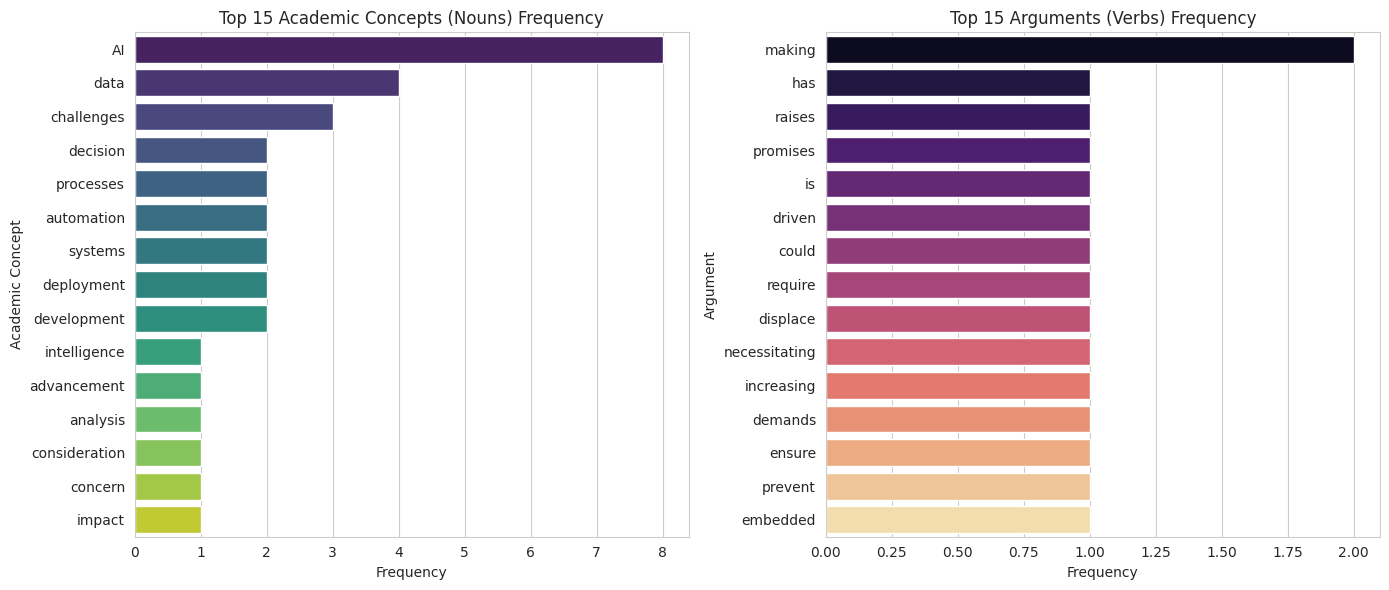

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a style for better aesthetics
sns.set_style("whitegrid")

# Create a figure with two subplots
plt.figure(figsize=(14, 6))

# Plotting Academic Concepts Frequency
plt.subplot(1, 2, 1) # 1 row, 2 columns, first plot
sns.barplot(x='Frequency', y='Concept', data=concepts_df.head(15), palette='viridis')
plt.title('Top 15 Academic Concepts (Nouns) Frequency')
plt.xlabel('Frequency')
plt.ylabel('Academic Concept')

# Plotting Arguments Frequency
plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot
sns.barplot(x='Frequency', y='Argument', data=arguments_df.head(15), palette='magma')
plt.title('Top 15 Arguments (Verbs) Frequency')
plt.xlabel('Frequency')
plt.ylabel('Argument')

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()